# Anomaly Detection using PyOD

This notebook demonstrates anomaly/outlier detection using the PyOD library. We'll use multiple detection algorithms to identify unusual patterns in data, which is crucial for fraud detection, quality control, and system monitoring.

**Objective**: Apply various anomaly detection algorithms to identify outliers in multivariate data and compare their performance.

In [1]:
# Installing PyOD
!pip install pyod -q

# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyod.models.iforest import IForest
from pyod.models.lof import LOF
from pyod.models.knn import KNN
from pyod.utils.data import generate_data
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Setting style
sns.set_style("whitegrid")
np.random.seed(42)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 7.4 MB/s eta 0:00:00


## Data Generation

Generating synthetic data with a small percentage of outliers using PyOD's built-in data generator. The contamination factor represents the proportion of anomalies in the dataset.

Training data shape: (500, 2)
Test data shape: (100, 2)
Training outliers: 50.0 (10.0%)
Test outliers: 10.0 (10.0%)


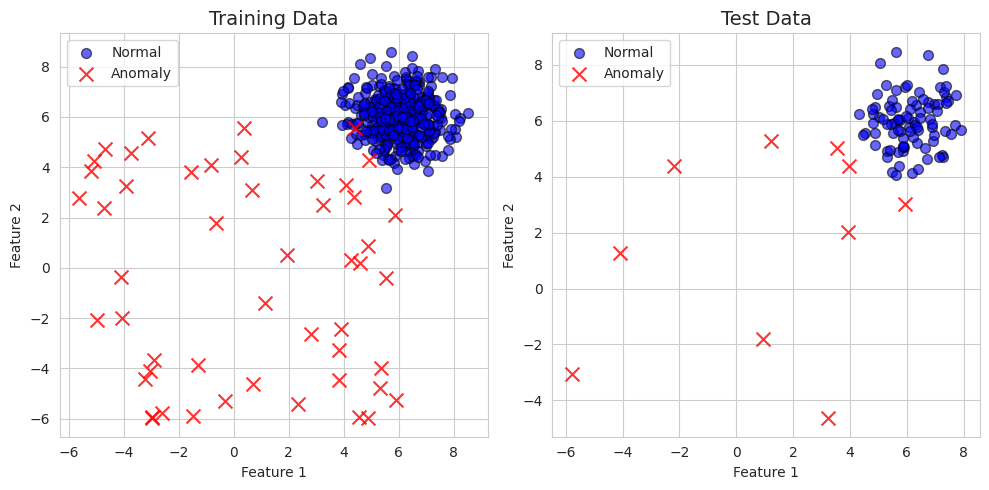

In [2]:
# Generating synthetic data with outliers
n_samples = 500
contamination = 0.1  # 10% outliers
n_features = 2

X_train, X_test, y_train, y_test = generate_data(
    n_train=n_samples,
    n_test=100,
    n_features=n_features,
    contamination=contamination,
    random_state=42
)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training outliers: {y_train.sum()} ({y_train.sum()/len(y_train)*100:.1f}%)")
print(f"Test outliers: {y_test.sum()} ({y_test.sum()/len(y_test)*100:.1f}%)")

# Visualizing the data
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1],
           c='blue', alpha=0.6, edgecolors='k', s=50, label='Normal')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1],
           c='red', marker='x', s=100, alpha=0.8, label='Anomaly')
plt.title('Training Data', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1],
           c='blue', alpha=0.6, edgecolors='k', s=50, label='Normal')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1],
           c='red', marker='x', s=100, alpha=0.8, label='Anomaly')
plt.title('Test Data', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

## Training Multiple Anomaly Detection Models

Training three different anomaly detection algorithms: Isolation Forest, Local Outlier Factor (LOF), and K-Nearest Neighbors (KNN). Each algorithm uses a different approach to identify outliers.

In [3]:
# Training multiple anomaly detection models
models = {
    'Isolation Forest': IForest(contamination=contamination, random_state=42),
    'LOF': LOF(contamination=contamination),
    'KNN': KNN(contamination=contamination)
}

# Training and storing results
results = {}

for name, model in models.items():
    # Training the model
    model.fit(X_train)

    # Predicting on test data (0 = normal, 1 = anomaly)
    y_pred = model.predict(X_test)

    # Getting anomaly scores (higher = more anomalous)
    scores = model.decision_function(X_test)

    results[name] = {
        'predictions': y_pred,
        'scores': scores,
        'model': model
    }

    print(f"{name} trained successfully!")

print("\nAll models trained!")

Isolation Forest trained successfully!
LOF trained successfully!
KNN trained successfully!

All models trained!


## Evaluating Model Performance

Comparing the performance of different anomaly detection algorithms using classification metrics like precision, recall, and F1-score.

In [4]:
# Evaluating each model
print(f"{'='*60}")
print(f"Anomaly Detection Performance Comparison")
print(f"{'='*60}\n")

for name, result in results.items():
    y_pred = result['predictions']

    print(f"\n{name}:")
    print("-" * 40)
    print(classification_report(y_test, y_pred,
                               target_names=['Normal', 'Anomaly']))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{cm}")
    print(f"Detected anomalies: {y_pred.sum()} out of {len(y_pred)}")

Anomaly Detection Performance Comparison


Isolation Forest:
----------------------------------------
              precision    recall  f1-score   support

      Normal       0.97      0.99      0.98        90
     Anomaly       0.88      0.70      0.78        10

    accuracy                           0.96       100
   macro avg       0.92      0.84      0.88       100
weighted avg       0.96      0.96      0.96       100

Confusion Matrix:
[[89  1]
 [ 3  7]]
Detected anomalies: 8 out of 100

LOF:
----------------------------------------
              precision    recall  f1-score   support

      Normal       0.95      0.93      0.94        90
     Anomaly       0.50      0.60      0.55        10

    accuracy                           0.90       100
   macro avg       0.73      0.77      0.74       100
weighted avg       0.91      0.90      0.90       100

Confusion Matrix:
[[84  6]
 [ 4  6]]
Detected anomalies: 12 out of 100

KNN:
----------------------------------------
         

## Visualizing Detection Results

Plotting the predictions from each model to visually compare how different algorithms identify anomalies.

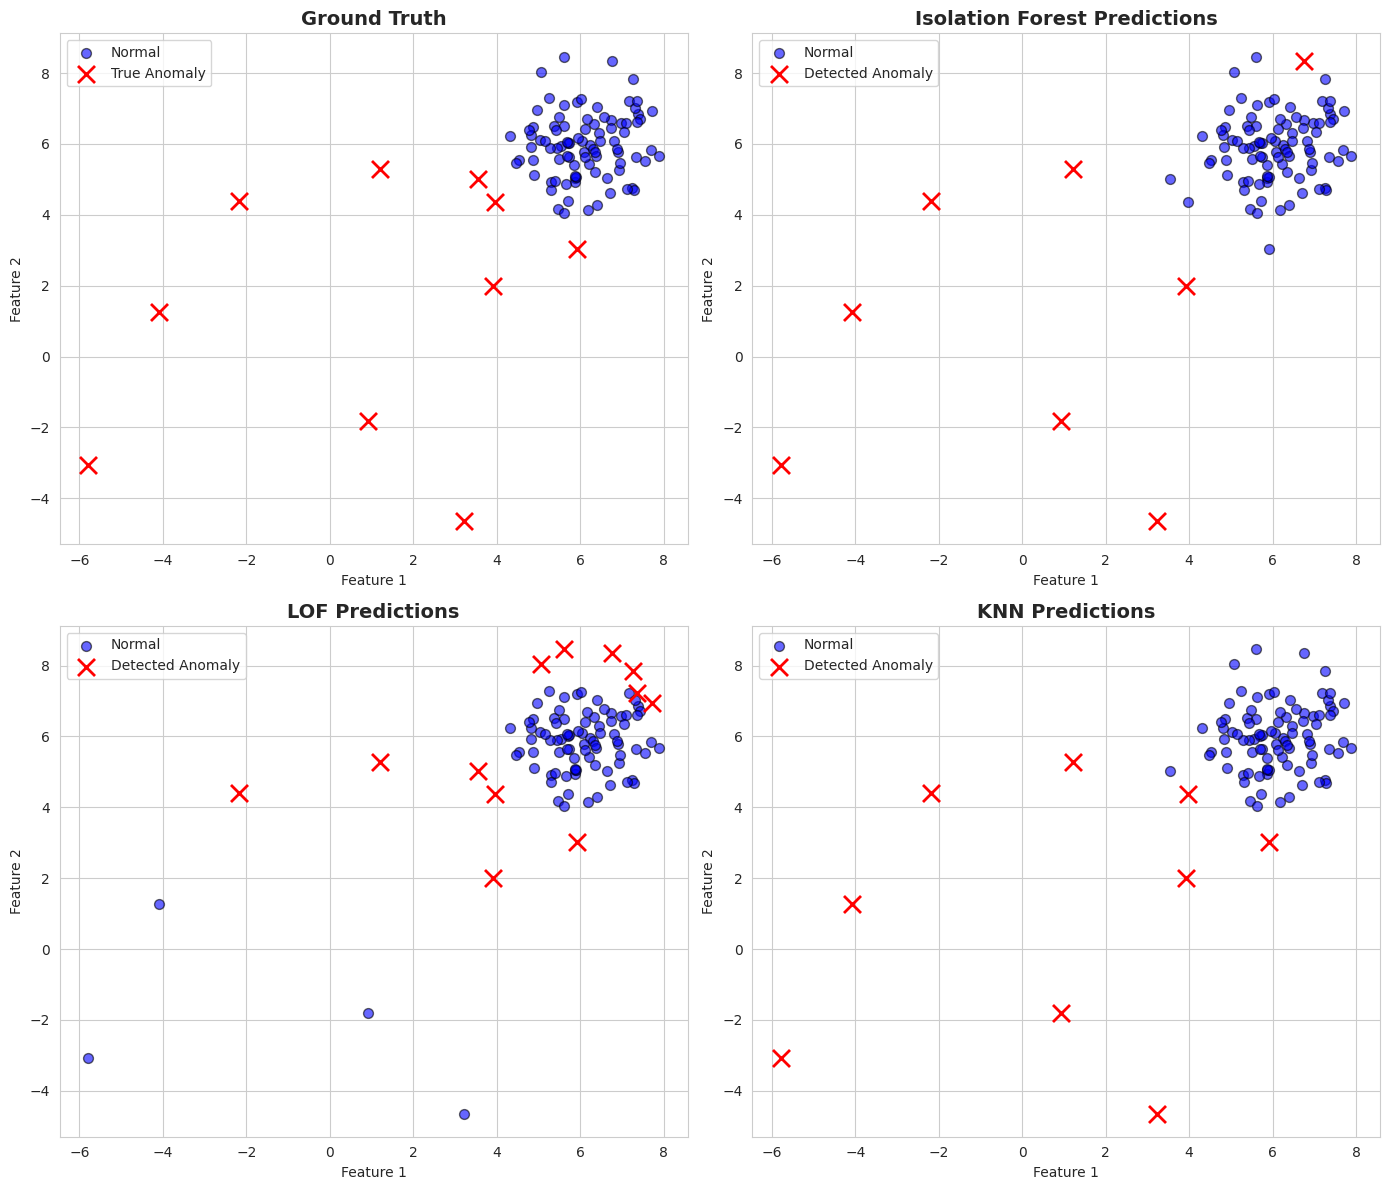

In [5]:
# Visualizing predictions from all models
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

# Ground truth
axes[0].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1],
               c='blue', alpha=0.6, edgecolors='k', s=50, label='Normal')
axes[0].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1],
               c='red', marker='x', s=150, linewidths=2, label='True Anomaly')
axes[0].set_title('Ground Truth', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].legend()

# Model predictions
for idx, (name, result) in enumerate(results.items(), start=1):
    y_pred = result['predictions']

    axes[idx].scatter(X_test[y_pred==0, 0], X_test[y_pred==0, 1],
                     c='blue', alpha=0.6, edgecolors='k', s=50, label='Normal')
    axes[idx].scatter(X_test[y_pred==1, 0], X_test[y_pred==1, 1],
                     c='red', marker='x', s=150, linewidths=2, label='Detected Anomaly')
    axes[idx].set_title(f'{name} Predictions', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].legend()

plt.tight_layout()
plt.show()

## Analyzing Anomaly Scores

Examining the distribution of anomaly scores to understand how confident each model is in its predictions. Higher scores indicate stronger belief that a point is anomalous.

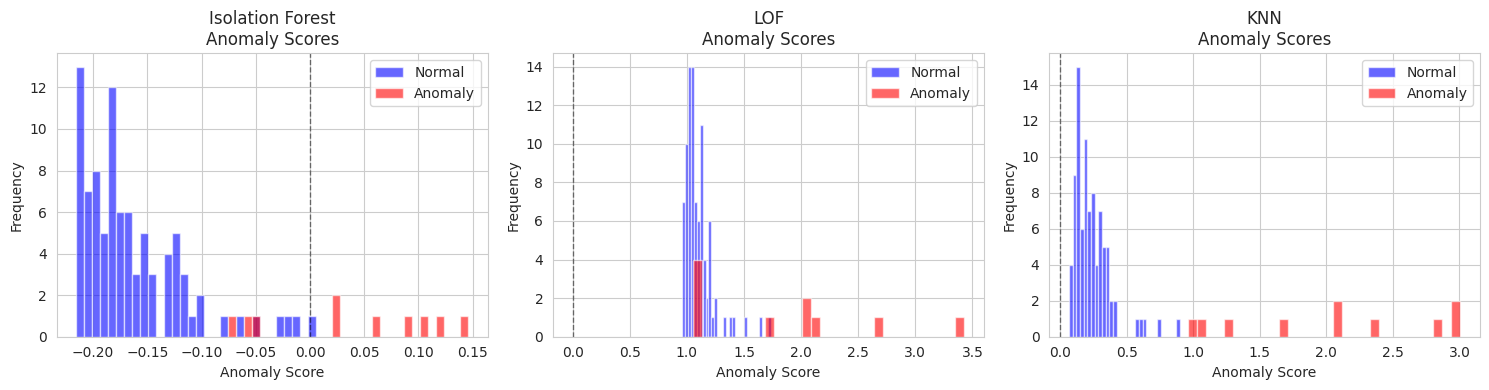


Anomaly detection complete!
Best performing model: Compare F1-scores above to determine


In [6]:
# Plotting anomaly score distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (name, result) in enumerate(results.items()):
    scores = result['scores']

    # Separating scores for normal and anomaly points
    normal_scores = scores[y_test == 0]
    anomaly_scores = scores[y_test == 1]

    axes[idx].hist(normal_scores, bins=30, alpha=0.6, label='Normal', color='blue')
    axes[idx].hist(anomaly_scores, bins=30, alpha=0.6, label='Anomaly', color='red')
    axes[idx].set_title(f'{name}\nAnomaly Scores', fontsize=12)
    axes[idx].set_xlabel('Anomaly Score')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()
    axes[idx].axvline(x=0, color='black', linestyle='--', linewidth=1, alpha=0.5)

plt.tight_layout()
plt.show()

print("\nAnomaly detection complete!")
print(f"Best performing model: Compare F1-scores above to determine")

## Identifying the Model with Highest Anomaly Score

Finding which model assigned the highest anomaly score and examining the most anomalous points detected by each algorithm.

Maximum Anomaly Scores by Model

Isolation Forest:
  Maximum anomaly score: 0.1458
  Most anomalous point index: 90
  Point coordinates: [-5.78980811 -3.07023251]
  True label: Anomaly

LOF:
  Maximum anomaly score: 3.4288
  Most anomalous point index: 94
  Point coordinates: [1.20731451 5.29050428]
  True label: Anomaly

KNN:
  Maximum anomaly score: 3.0078
  Most anomalous point index: 96
  Point coordinates: [ 0.92622284 -1.81711599]
  True label: Anomaly

Model with HIGHEST anomaly score: LOF
Score: 3.4288


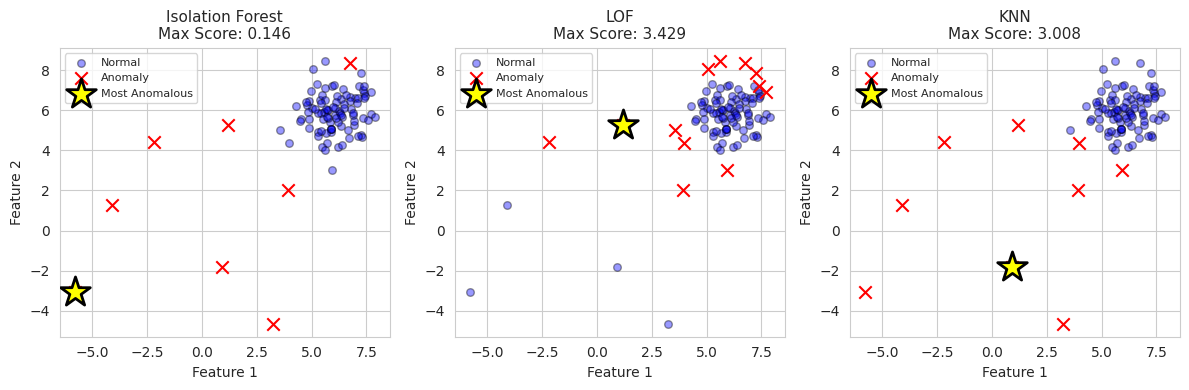

In [7]:
# Finding the model with highest anomaly score
max_scores = {}
most_anomalous_indices = {}

print(f"{'='*60}")
print(f"Maximum Anomaly Scores by Model")
print(f"{'='*60}\n")

for name, result in results.items():
    scores = result['scores']
    max_score = scores.max()
    max_idx = scores.argmax()

    max_scores[name] = max_score
    most_anomalous_indices[name] = max_idx

    print(f"{name}:")
    print(f"  Maximum anomaly score: {max_score:.4f}")
    print(f"  Most anomalous point index: {max_idx}")
    print(f"  Point coordinates: {X_test[max_idx]}")
    print(f"  True label: {'Anomaly' if y_test[max_idx] == 1 else 'Normal'}")
    print()

# Finding overall best model
best_model = max(max_scores, key=max_scores.get)
print(f"{'='*60}")
print(f"Model with HIGHEST anomaly score: {best_model}")
print(f"Score: {max_scores[best_model]:.4f}")
print(f"{'='*60}")

# Visualizing the most anomalous point from each model
plt.figure(figsize=(12, 4))

for idx, (name, result) in enumerate(results.items(), start=1):
    plt.subplot(1, 3, idx)
    y_pred = result['predictions']
    most_anomalous_idx = most_anomalous_indices[name]

    # Plotting all points
    plt.scatter(X_test[y_pred==0, 0], X_test[y_pred==0, 1],
               c='blue', alpha=0.4, edgecolors='k', s=30, label='Normal')
    plt.scatter(X_test[y_pred==1, 0], X_test[y_pred==1, 1],
               c='red', marker='x', s=80, linewidths=1.5, label='Anomaly')

    # Highlighting the most anomalous point
    plt.scatter(X_test[most_anomalous_idx, 0], X_test[most_anomalous_idx, 1],
               c='yellow', marker='*', s=500, edgecolors='black',
               linewidths=2, label='Most Anomalous', zorder=5)

    plt.title(f'{name}\nMax Score: {max_scores[name]:.3f}', fontsize=11)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(fontsize=8)

plt.tight_layout()
plt.show()